In [8]:
import numpy as np
from random import randint
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [9]:
import math
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2*math.exp(-x)*x*z - 2*y**3 + y**2 - 3*z**3
   return fitness

In [10]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [11]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [12]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(0, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [13]:
num_var = 3
sizeof_pop= 100
upper_limit = 10000
lower_limit = 0
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[  17.82225894 6712.0130321  1532.65708348]
 [6165.35580625 9425.83430971 5658.34836474]
 [9365.19746777 4389.05666177 1288.98713831]
 [3950.3517484  6554.44661304 8295.87377068]
 [4387.13939525 4148.31046652 1185.28218134]
 [ 222.13917326 9144.02381273 4139.70207446]
 [ 679.90873435  262.98981078 8936.41674075]
 [9706.28840884 5134.78514597  153.12401911]
 [ 954.54872521 7284.18390462 9828.6161227 ]
 [6434.8533043  3425.82490776 3361.5299765 ]
 [7237.53480303 8310.09496522 8239.08746773]
 [7266.78829843 8960.05757659  101.72733996]
 [5717.929289   4673.0938303  5102.52930595]
 [6797.5614949  9588.6973716  4135.21999336]
 [5352.06577131 9468.26381601  150.79515008]
 [1570.12378192 8665.54456209 8932.03331663]
 [6731.62434347 1731.70936219 8975.0829879 ]
 [3339.74805182 7691.95450542  940.72389271]
 [5812.6973059  7279.60801658 5784.73506123]
 [7457.8939495  6802.88884903 6096.22062638]
 [  26.52522287   15.80613015 2557.0479157 ]
 [5855.95332567  561.10983235 4020.96129694]
 [3978.527

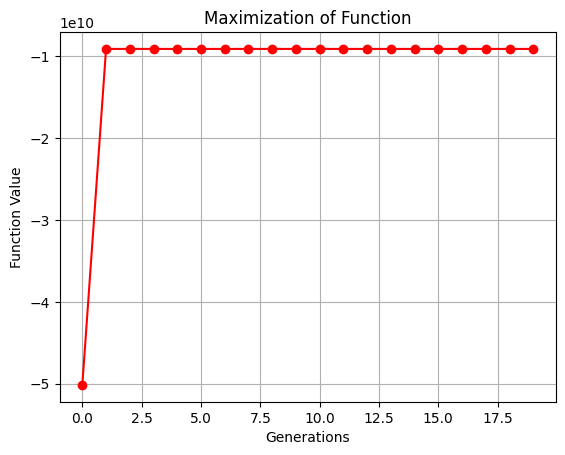

In [14]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()